
# 🎬 IMDB Sentiment Analysis – Orlene Jane Bilog

This notebook builds a machine learning model to classify IMDB movie reviews as **positive** or **negative**.

## Steps Covered
1. Data Loading & Exploration
2. Text Preprocessing
3. Feature Extraction (TF-IDF)
4. Model Building & Evaluation
5. Pipeline & Optimization
6. Inference & Results


In [7]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load Dataset (replace with your path if needed)
df = pd.read_excel('/content/IMDB Dataset.xlsx')

# Preview
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:

# Dataset shape and distribution
print("Shape:", df.shape)
print("\nClass distribution:")
print(df['sentiment'].value_counts())

# Example reviews
df.sample(5)


Shape: (50000, 2)

Class distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


,review,sentiment
37409,Does anything at all happen in this movie. The...,negative
1538,The plot of The Thinner is decidedly thin. And...,negative
43428,"This movie started out good, i felt like i was...",negative
15598,It's not very often a movie can literally make...,positive
37207,How can a movie have Ozzy Osbourne and still s...,negative


In [9]:

# Text Cleaning Function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning
df['clean_review'] = df['review'].apply(clean_text)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)



Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



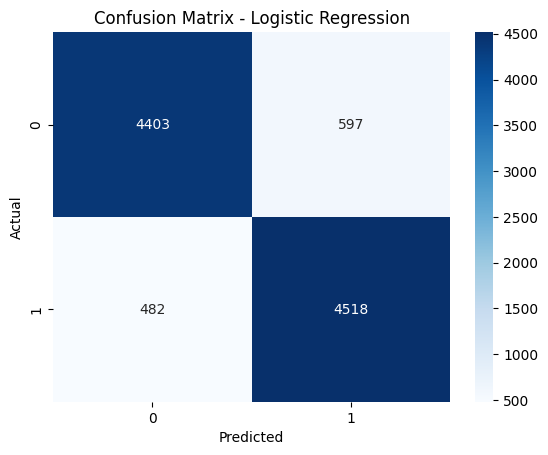


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.84      0.86      5000
    positive       0.84      0.88      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



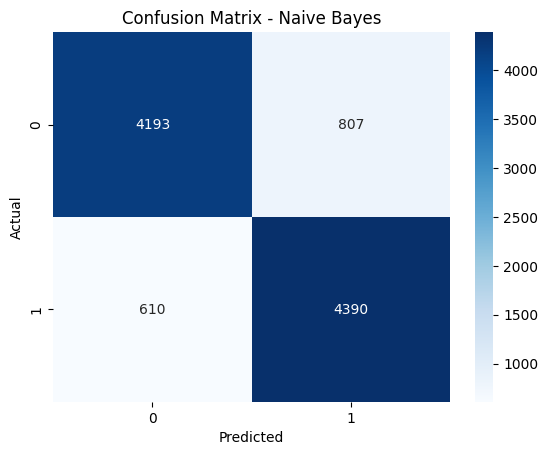


SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      5000
    positive       0.88      0.89      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



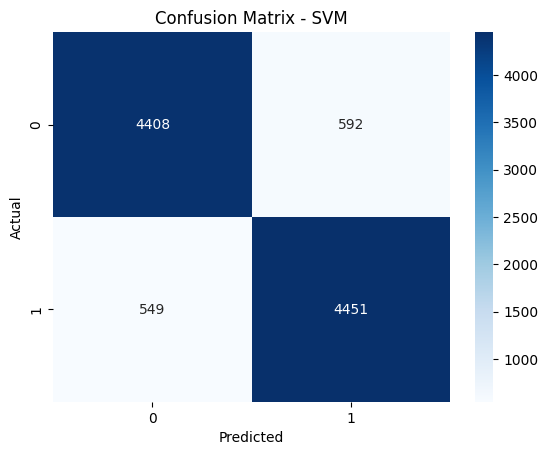

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.8921,0.883284,0.9036,0.893327
1,Naive Bayes,0.8583,0.844718,0.8780,0.861038
2,SVM,0.8859,0.882610,0.8902,0.886389


In [10]:

# Models
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', vectorizer),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='positive')
    rec = recall_score(y_test, y_pred, pos_label='positive')
    f1 = f1_score(y_test, y_pred, pos_label='positive')

    results.append([name, acc, prec, rec, f1])

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Compare results
import pandas as pd
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
results_df


In [11]:

# Final Model: Logistic Regression
final_pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('clf', LogisticRegression(max_iter=200))
])
final_pipeline.fit(X_train, y_train)

# Test on new reviews
test_reviews = [
    "This movie was an absolute masterpiece, I loved every second of it!",
    "I can't believe I wasted two hours watching this boring mess.",
    "Amazing acting, great storyline, definitely worth watching.",
    "Terrible. Just terrible. Avoid at all costs.",
    "It was okay, some parts were good but overall I expected more."
]
predictions = final_pipeline.predict(test_reviews)

for review, pred in zip(test_reviews, predictions):
    print(f"\nReview: {review}\nPredicted Sentiment: {pred}")

# Final accuracy
final_preds = final_pipeline.predict(X_test)
final_acc = accuracy_score(y_test, final_preds)
print(f"\nFinal Model Accuracy: {final_acc:.4f}")



Review: This movie was an absolute masterpiece, I loved every second of it!
Predicted Sentiment: positive

Review: I can't believe I wasted two hours watching this boring mess.
Predicted Sentiment: negative

Review: Amazing acting, great storyline, definitely worth watching.
Predicted Sentiment: positive

Review: Terrible. Just terrible. Avoid at all costs.
Predicted Sentiment: negative

Review: It was okay, some parts were good but overall I expected more.
Predicted Sentiment: positive

Final Model Accuracy: 0.8921
